<a href="https://colab.research.google.com/github/Vikaas1517/Unsupervised-Learning/blob/main/DBScan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


/tmp/ipython-input-2982963239.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre', data=data, palette='viridis')


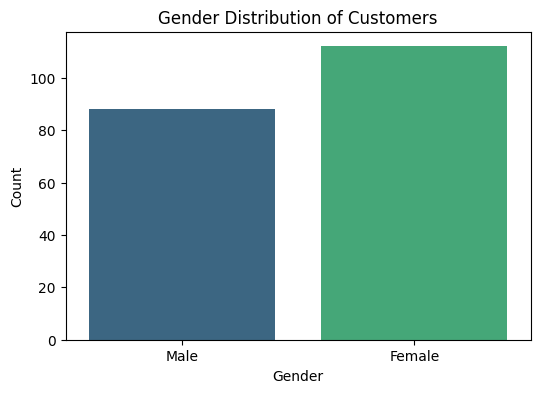

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='Genre', data=data, palette='viridis')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

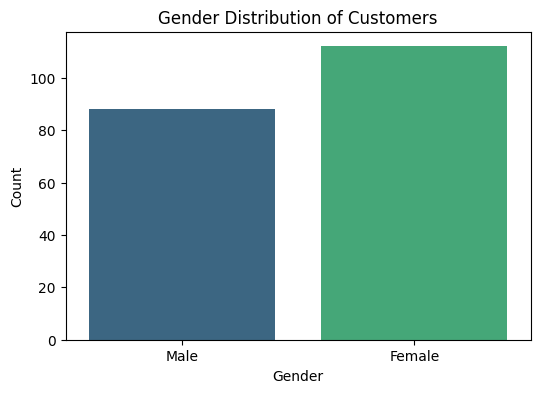

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='Genre', hue='Genre', data=data, palette='viridis', legend=False)
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

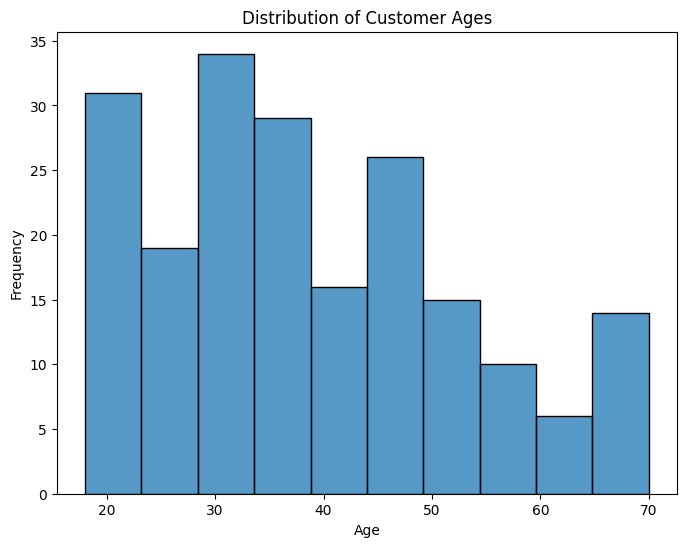

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=10, kde=False)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

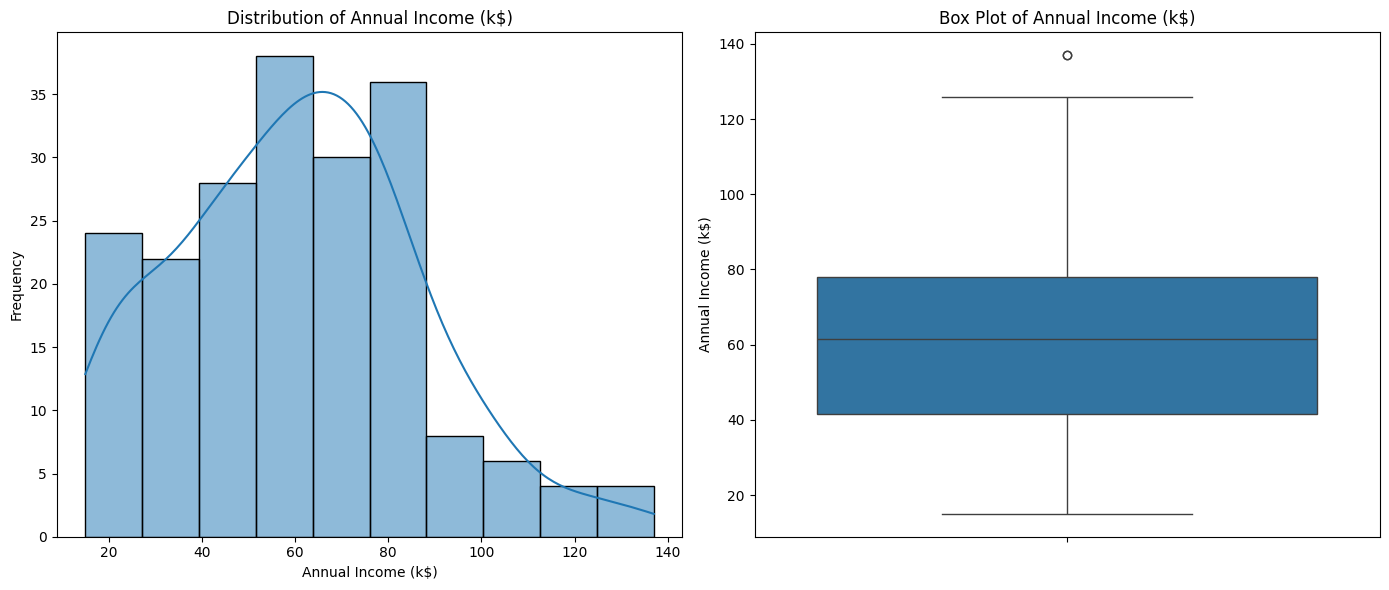

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Histogram for Annual Income
plt.subplot(1, 2, 1)
sns.histplot(data['Annual_Income_(k$)'], bins=10, kde=True)
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

# Box Plot for Annual Income
plt.subplot(1, 2, 2)
sns.boxplot(y=data['Annual_Income_(k$)'])
plt.title('Box Plot of Annual Income (k$)')
plt.ylabel('Annual Income (k$)')

plt.tight_layout()
plt.show()

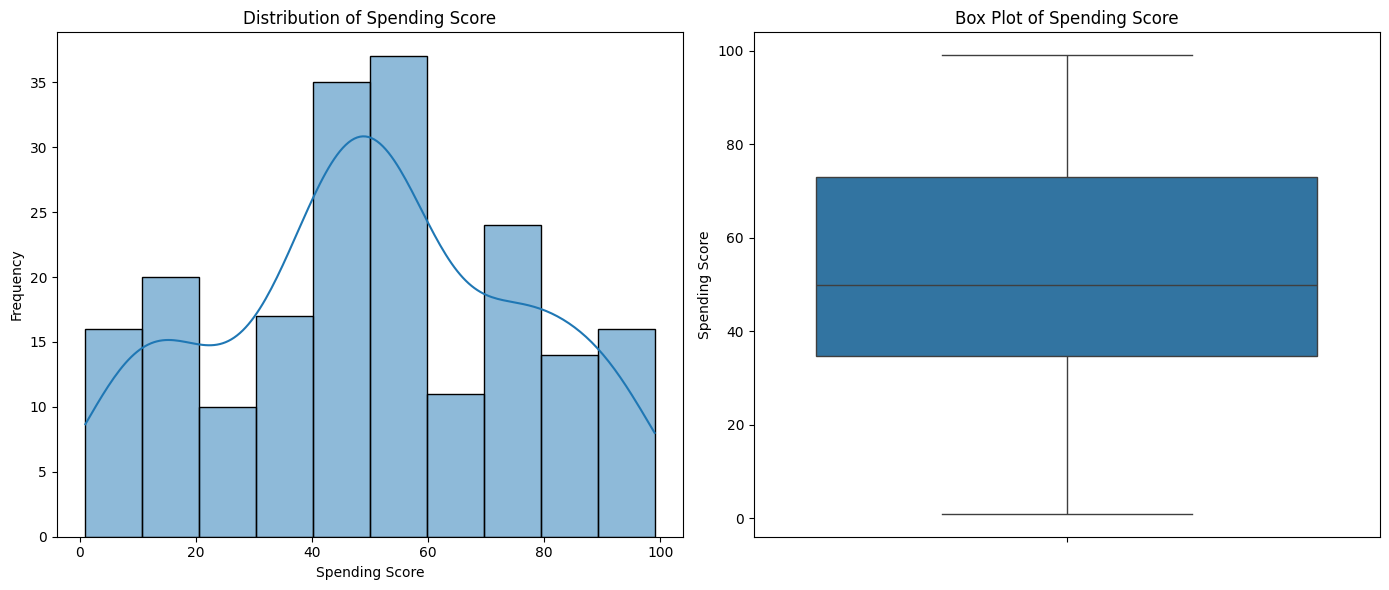

In [11]:
plt.figure(figsize=(14, 6))

# Histogram for Spending Score
plt.subplot(1, 2, 1)
sns.histplot(data['Spending_Score'], bins=10, kde=True)
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')

# Box Plot for Spending Score
plt.subplot(1, 2, 2)
sns.boxplot(y=data['Spending_Score'])
plt.title('Box Plot of Spending Score')
plt.ylabel('Spending Score')

plt.tight_layout()
plt.show()

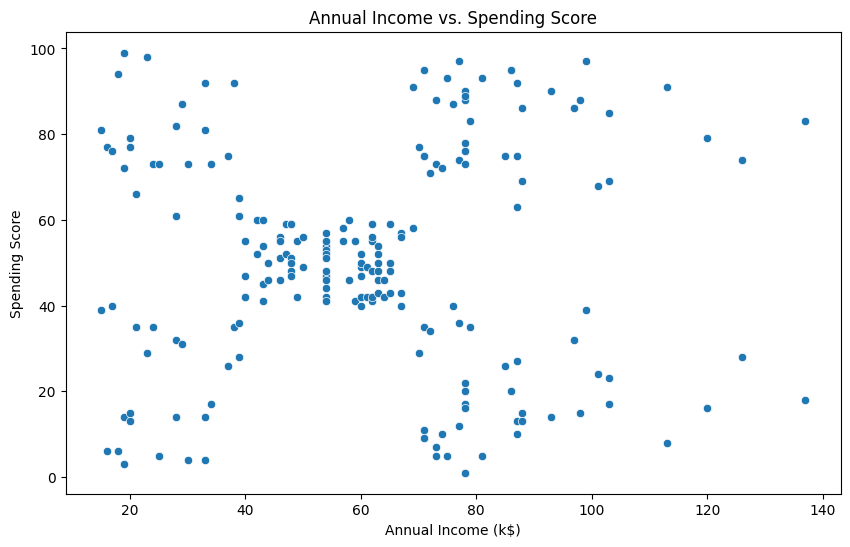

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score', data=data)
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

X = data[['Annual_Income_(k$)', 'Spending_Score']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape of original features X:", X.shape)
print("First 5 rows of scaled features X_scaled:\n", X_scaled[:5])

Shape of original features X: (200, 2)
First 5 rows of scaled features X_scaled:
 [[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


In [36]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

print("DBSCAN Cluster Labels:", dbscan_labels)
print("Number of unique clusters (including noise -1):", np.unique(dbscan_labels))

DBSCAN Cluster Labels: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0 -1
 -1  1 -1 -1 -1 -1 -1 -1]
Number of unique clusters (including noise -1): [-1  0  1]


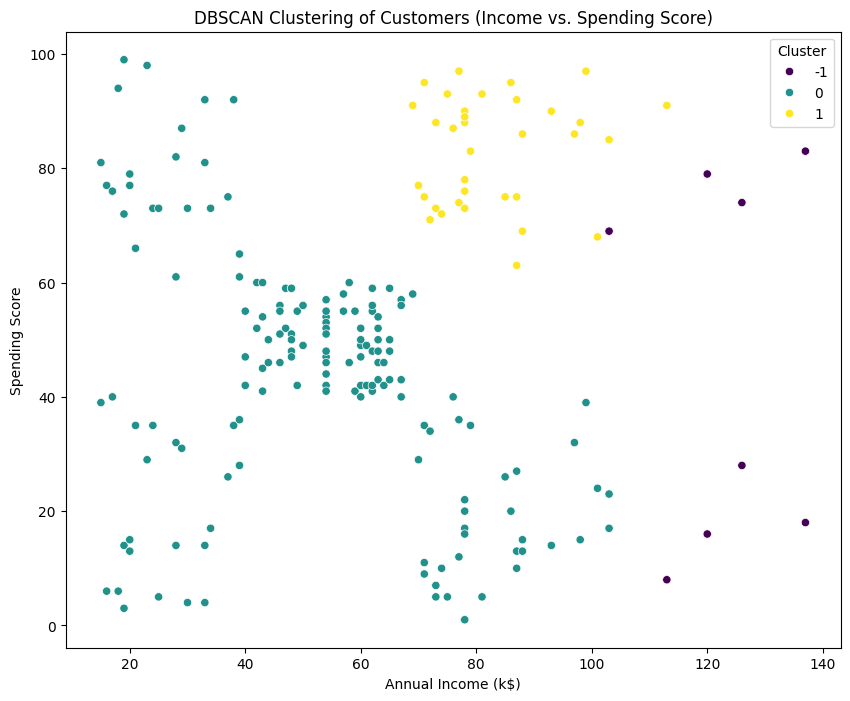

In [15]:
X_with_clusters = X.copy()
X_with_clusters['Cluster'] = dbscan_labels

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score', hue='Cluster', data=X_with_clusters, palette='viridis', legend='full')
plt.title('DBSCAN Clustering of Customers (Income vs. Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

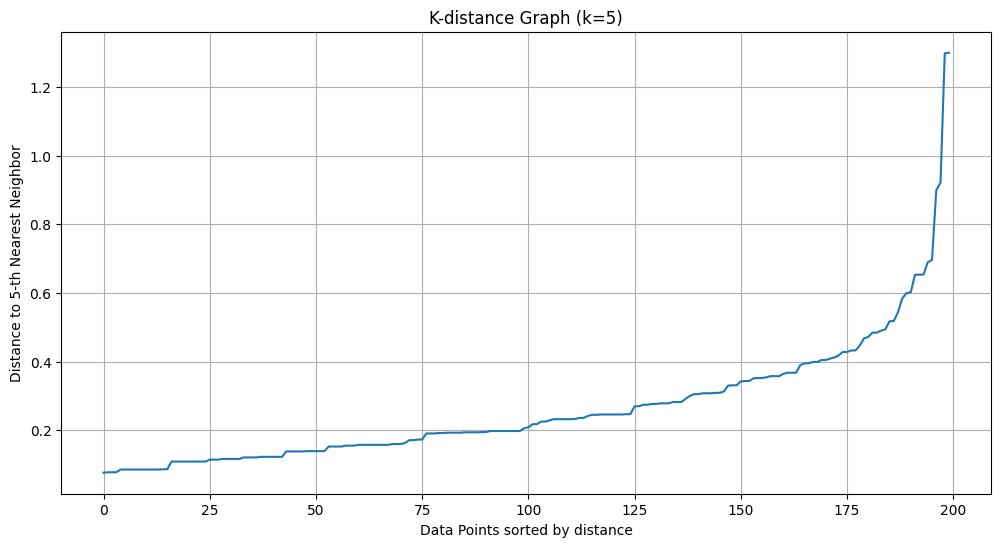

In [16]:
from sklearn.neighbors import NearestNeighbors
k = 5

neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, k-1], axis=0)
plt.figure(figsize=(12, 6))
plt.plot(distances)
plt.title(f'K-distance Graph (k={k})')
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'Distance to {k}-th Nearest Neighbor')
plt.grid(True)
plt.show()

Observe the K-distance graph for an 'elbow' point, which is where the curve sharply changes its slope. The y-value at this elbow point can be considered an optimal `eps` value.

After identifying a new `eps` value, you can re-run the DBSCAN clustering with the updated parameter.